In [1]:
import pandas as pd
import numpy as np

In [2]:
lcn = pd.read_csv(r"F:\carreer\LungCapData.csv")

In [3]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [4]:
# understading the requirement / problem statement

# to build a prediction model which can predict the lung cap

In [5]:
lcn.isnull().sum() # to check the nulls

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [6]:
lcn.Smoke = lcn.Smoke.replace({"no":0 , "yes":1})
lcn.Gender = lcn.Gender.replace({"male":0 , "female":1})
lcn.Caesarean = lcn.Caesarean.replace({"no":0 , "yes":1})

In [7]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


In [8]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


In [9]:
lcn.info() #to check int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    int64  
 4   Gender     725 non-null    int64  
 5   Caesarean  725 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 34.1 KB


# Data Sampling

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
lcn_train , lcn_test = train_test_split(lcn, test_size=.2)

In [12]:
lcn_train_x = lcn_train.iloc[: , 1::]
lcn_test_x = lcn_test.iloc[: , 1::]

In [13]:
lcn_train_y = lcn_train.iloc[: , 0]
lcn_test_y = lcn_test.iloc[: , 0]

In [14]:
# import necesary fuction from sklearn 
# create an object of that fucntion 
# run the fit fucntion and model is created
# run the predictionn fuction ( pediction is done)

# Buidling the Model using the Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linreg = LinearRegression() 

In [17]:
linreg.fit( lcn_train_x , lcn_train_y) # model is fitted

LinearRegression()

# Rsquare

In [18]:
rsquare = linreg.score( lcn_train_x , lcn_train_y)
rsquare

0.8435858813380767

# Adjusted Rsquare

In [19]:
# value of N
# in adjusted rqaure formula N is total no of records so here
N = lcn_train_x.shape[0] # here 0 is denoted for records
N # therefore N is 580

580

In [20]:
# value of K
# in adjusted rqaure formula N is total no of Columns so here
K = lcn_train_x.shape[1] # here 1 is denoted for columns
K

5

In [21]:
adj_rsquare = 1 - (1 - rsquare) * ( N- 1) / (N - K - 1)
adj_rsquare

0.8422233890152376

In [22]:
# here adjusted Rsquare is close to Rsquare
# therefore model seems to be quite good 

In [23]:
lcn_train_x.columns # to find how many x variable i have

Index(['Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [24]:
# linreg is my name of the model therefore for finding coefficcient
linreg.coef_ # gives value B0 (age) ,B1(smoke) , B2(gender)...
# here age , height is positive relation
# smoke, gender , Caesarean is negative relation

array([ 0.15773157,  0.25528386, -0.61475202, -0.46193903, -0.20531065])

In [25]:
linreg.intercept_ # intercept is nothing but the Bo (beta not) there fore intercept will give Bo i.e c in the slope formula

-10.275617334013113

In [26]:
pred_train = linreg.predict(lcn_train_x)
pred_test = linreg.predict(lcn_test_x)

In [27]:
pred_test 


array([ 8.26173197,  9.74480646,  7.79195251,  6.2240223 ,  6.85310946,
        9.18466377, 11.36884931,  4.12879304,  5.25095849,  7.60705399,
        7.92737244,  9.76403866,  4.30854137,  8.38018896, 11.45455698,
        9.90460878,  5.00131943, 10.8327532 ,  8.21061276,  7.6006536 ,
        5.51536486,  4.99219693,  9.63084829,  4.61488201,  3.6754819 ,
        3.13318597,  8.17081168,  5.80910529, 10.39634256,  7.0828025 ,
        3.06007851, 12.2760266 ,  9.83714612,  9.16221482,  6.51346244,
        7.81613639,  2.76879923,  7.90640531,  7.39370439,  9.76617185,
       11.52658089,  3.53008957,  7.29779066, 10.73520091,  5.89106973,
        7.25693995,  4.40960529,  7.34536974,  5.28774257,  2.6680302 ,
        8.92540758, 10.85719803,  5.53042623,  1.29999744,  5.18215132,
        8.19426932,  8.00644811,  6.36101835, 12.01162023, 10.52989026,
        9.24543198,  8.53335928,  4.79466427,  4.49803507,  7.15482641,
        9.85568519,  7.38002063,  6.34005122,  9.87908039,  5.79

# here question arises how this values has been calculated
# taking one value 7.62949921 from up predited data 

In [28]:
len(pred_test)

145

In [29]:
lcn_test_x.head(1)

,Age,Height,Smoke,Gender,Caesarean
411,13,68.8,1,1,0


In [30]:
# as we know the value of these coeff beta  1 ,2 , 3 , 4 , 5 relation at line no 24 i.e 
# array([ 0.15092595,  0.27240058, -0.70290372, -0.32741632, -0.24188176])
# b0 value -11.353141206304743 from line 25
# so know adding the value with the beta not  with multiplication with the data above
# i.e y = mx + Bo
#
#Age	Height	Smoke	Gender	Caesarean
#678	14	66.6	1	1	1
-11.353141206304743 + 0.15092595*14 + 66.6*0.27240058 + -0.70290372* 1 + -0.32741632*1 + -0.24188176*1
# hence proved
# after running the fit function the relation betweeen the x and y have been establised this  is how  it is doing the predition

7.629498921695254

In [31]:
# what is mathematical modeling = it is nothing but the equation

In [32]:
# we know y = mx + c therefore Bo is c  
# if the value of m and c are know then we can do the prediction

# m is 3 , c is 4.5
# there fore for prediction we have to just pass the x value

# error on the train data
error = actual - predict

In [33]:
#here
err_test = lcn_test_y - pred_test

In [34]:
err_test

411    0.413268
92     0.005194
470    0.058047
514    0.000978
511   -0.153109
         ...   
393    0.517152
479   -0.844731
472    1.439219
89    -0.420214
391    1.362640
Name: LungCap, Length: 145, dtype: float64

In [35]:
# finding mse
mse = np.mean(np.square(err_test))
mse

1.1360002427315972

In [36]:
# finding rmse
rmse  = np.sqrt(mse) # it is nothing but the square root of  the rmse
rmse

1.0658331214273635

In [37]:
# finding mape

mape = np.mean(np.abs(err_test * 100)/ lcn_test_y)
mape

17.295491127909873

In [38]:
# build the linear regression model property price

In [39]:
# lets check the assumptions
# few always do so 1.error term are normmally distributed there is no pattern amongst them 
# homocedenicity # multicollinearity

In [40]:
err_train = lcn_train_y - pred_train

In [41]:
np.mean(err_train) # here we get value close to the zero

-1.4915272082550378e-15

# Visualizing the Data

In [42]:
import matplotlib.pyplot as plt

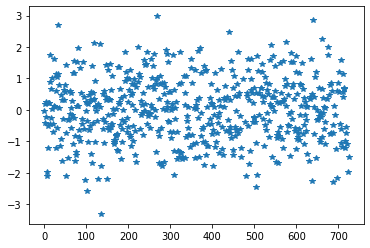

In [43]:
plt.plot(err_train , '*') # here we cannot see any pattern but here may be
# few values which may be far away from or less which are outlier so these may create some problem in model building

(array([ 1.,  0.,  2., 11.,  6., 30., 30., 48., 67., 56., 70., 70., 60.,
        45., 31., 27., 17.,  5.,  1.,  3.]),
 array([-3.30904724, -2.99458651, -2.68012577, -2.36566504, -2.05120431,
        -1.73674358, -1.42228285, -1.10782211, -0.79336138, -0.47890065,
        -0.16443992,  0.15002081,  0.46448155,  0.77894228,  1.09340301,
         1.40786374,  1.72232447,  2.03678521,  2.35124594,  2.66570667,
         2.9801674 ]),
 <BarContainer object of 20 artists>)

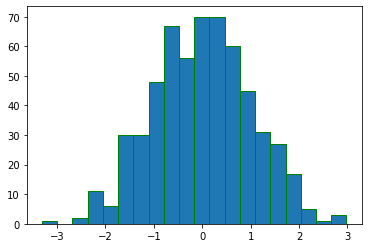

In [44]:
plt.hist(err_train , bins = 20 , edgecolor = 'g') # there by this histogram it seems to be normal distributed

In [45]:
pred_actual_df = pd.DataFrame()

In [46]:
pred_actual_df['Actual'] = lcn_train_y
pred_actual_df['Predict'] = pred_train

In [47]:
pred_actual_df.head()

,Actual,Predict
706,9.175,10.241039
496,8.350,8.116538
45,6.700,6.978261
675,12.125,10.122520
102,3.450,6.041750


In [48]:
import seaborn as sns

# to check homocedenicity

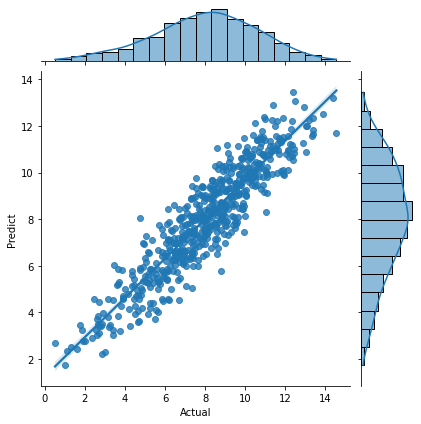

In [49]:
sns.jointplot(x = 'Actual' , y = 'Predict',data = pred_actual_df, kind= 'reg') # reg means regression plot
# here actual is always on x axis and preditive is on the y axis 
# becuase prediction is depended on actual and actual is not dependent on anyone

In [50]:
# code to remove outlier
def remove_outlier(df,col,k=2):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print("Number of outlier removed ==>" , df.shape[0] - df1.shape[0])

In [51]:
remove_outlier(lcn,'LungCap', k=2)

(695, 6)
Number of outlier removed ==> 30


In [52]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0
